# Loan Data Exploration
### by Bhavin Patel

## Preliminary Wrangling

> This document investigates the loan-dataset (from Propser) that consists of information regarding 113,937 loans including fields like Loan Amount, Borrower Rate, Borrower Income, Borrower Employment Status etc. The main objective of this project is to explore the relationships among different variables that may affect the loan status using several visualisation techniques.

## Table of Contents
<ul>
<li><a href="#exploratory-data-analysis">Exploratory Data Analysis</a></li>
<li><a href="#univariate-exploration">Univariate Exploration</a></li>
    <ul>
    <li><a href="#univariate-analysis">Univariate Analysis</a></li>
    </ul>
<li><a href="#bivaraite-exploration">Bivariate Exploration</a></li>
<ul>
    <li><a href="#bivariate-analysis">Bivariate Analysis</a></li>
</ul>    
<li><a href="#multivariate-exploration">Multivariate Exploration</a></li>
<ul>
    <li><a href="#multivariate-analysis">Multivariate Analysis</a></li>
    </ul>    
</ul>



<a id = "exploratory-data-analysis"></a>
## Exploratory Data Analysis

In [1]:
# Importing all the packages required for analysis, setting plots inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# Loading the dataset into a pandas dataframe using pd.read_csv() function
df = pd.read_csv('prosperLoanData.csv')
df.sample(10)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
113082,CDE43559437243734D8D431,644276,2012-09-24 11:05:40.187000000,NaN,60,Completed,2014-02-28 00:00:00,0.27554,0.2498,0.2398,...,-131.08,0.00,0.00,0.00,0.0,1.0,0,0,0.0,9
90033,B3693589950518738549EE9,920594,2013-09-23 13:20:30.077000000,NaN,36,Current,NaN,0.27623,0.2379,0.2279,...,-19.89,0.00,0.00,0.00,0.0,1.0,0,0,0.0,2
69535,3FFC3540140199131A1FD1E,565017,2012-03-03 14:50:42.860000000,NaN,36,Current,NaN,0.28370,0.2452,0.2352,...,-87.42,0.00,0.00,0.00,0.0,1.0,0,0,0.0,12
105203,931F337481463885736864C,63946,2006-11-19 17:08:40.460000000,D,36,Completed,2009-12-05 00:00:00,0.26752,0.2599,0.2499,...,-84.78,0.00,0.00,0.00,0.0,1.0,0,0,0.0,80
20795,46F8347029063505125BA7D,436876,2009-12-04 03:44:10.027000000,NaN,36,Completed,2011-03-31 00:00:00,0.27520,0.2365,0.2265,...,-4.79,0.00,0.00,0.00,0.0,1.0,0,0,0.0,30
27900,2CFE3365300233178A1FF29,11035,2006-05-03 20:29:06.550000000,HR,36,Defaulted,2006-12-11 00:00:00,0.24502,0.2375,0.2075,...,-3.30,0.00,2943.04,2943.05,0.0,1.0,0,0,0.0,28
24421,6C433502238931243039075,488520,2010-12-20 10:15:04.477000000,NaN,36,Completed,2012-07-10 00:00:00,0.12400,0.1029,0.0929,...,-48.65,0.00,0.00,0.00,0.0,1.0,0,0,0.0,113
1425,43DC3537082409530FA7FEB,551870,2012-01-16 12:17:43.463000000,NaN,36,Chargedoff,2014-01-19 00:00:00,0.35797,0.3177,0.3077,...,-46.22,-118.12,2461.20,2461.20,0.0,1.0,0,0,0.0,1
1255,37823591883331442590543,948946,2013-10-14 16:14:31.577000000,NaN,36,Current,NaN,0.18479,0.1485,0.1385,...,-35.82,0.00,0.00,0.00,0.0,1.0,0,0,0.0,1
105122,D16135860281142080A086E,873867,2013-08-19 14:53:48.857000000,NaN,36,Current,NaN,0.20462,0.1679,0.1579,...,-19.06,0.00,0.00,0.00,0.0,1.0,0,0,0.0,1


In [3]:
# Previewing the shape and data-types using df.shape and df.dtypes
print(df.shape)
print(df.dtypes)

(113937, 81)
ListingKey                      object
ListingNumber                    int64
ListingCreationDate             object
CreditGrade                     object
Term                             int64
                                ...   
PercentFunded                  float64
Recommendations                  int64
InvestmentFromFriendsCount       int64
InvestmentFromFriendsAmount    float64
Investors                        int64
Length: 81, dtype: object


In [4]:
# Printing concise summary of dataframe using df.info() function
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [5]:
## Checking for missing values throughout using df.isnull() function
pd.set_option('display.max_rows', None)
df.isnull().sum()

ListingKey                                  0
ListingNumber                               0
ListingCreationDate                         0
CreditGrade                             84984
Term                                        0
LoanStatus                                  0
ClosedDate                              58848
BorrowerAPR                                25
BorrowerRate                                0
LenderYield                                 0
EstimatedEffectiveYield                 29084
EstimatedLoss                           29084
EstimatedReturn                         29084
ProsperRating (numeric)                 29084
ProsperRating (Alpha)                   29084
ProsperScore                            29084
ListingCategory (numeric)                   0
BorrowerState                            5515
Occupation                               3588
EmploymentStatus                         2255
EmploymentStatusDuration                 7625
IsBorrowerHomeowner               

In [6]:
# Filtering rows without Prosper Scores using df.isnull() function
df = df[df['ProsperScore'].isnull() == False]

In [7]:
# Subsetting the dataset by selecting fields of interest for analysis
cols = ["CreditGrade", "Term", "LoanStatus", "BorrowerRate", "BorrowerAPR", "ProsperRating (numeric)", "ProsperRating (Alpha)", "ProsperScore", "BorrowerState", "Occupation", "EmploymentStatus", "EmploymentStatusDuration", "IsBorrowerHomeowner", "CreditScoreRangeLower", "CreditScoreRangeUpper", "CurrentCreditLines", "CurrentDelinquencies", "BankcardUtilization", "AvailableBankcardCredit", "DebtToIncomeRatio", "IncomeRange", "TotalProsperLoans", "LoanOriginalAmount", "MonthlyLoanPayment", "Recommendations", "Investors", "EmploymentStatusDuration", "TotalTrades", "MonthlyLoanPayment", "ListingCategory (numeric)",
"TotalInquiries"]
df = df[cols]

In [8]:
# Printing the summary-statistics using df.describe() function
df.describe()

,Term,BorrowerRate,BorrowerAPR,ProsperRating (numeric),ProsperScore,EmploymentStatusDuration,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,CurrentDelinquencies,...,TotalProsperLoans,LoanOriginalAmount,MonthlyLoanPayment,Recommendations,Investors,EmploymentStatusDuration,TotalTrades,MonthlyLoanPayment,ListingCategory (numeric),TotalInquiries
count,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,84834.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,19797.000000,84853.000000,84853.000000,84853.000000,84853.000000,84834.000000,84853.000000,84853.000000,84853.000000,84853.000000
mean,42.486135,0.196022,0.226658,4.072243,5.950067,103.055320,699.390240,718.390240,10.508032,0.322452,...,1.460676,9083.440515,291.930720,0.017560,68.264669,103.055320,23.928571,291.930720,3.312647,4.290396
std,11.640346,0.074631,0.079916,1.673227,2.376501,97.078884,47.095937,47.095937,5.317401,1.111996,...,0.790446,6287.860058,186.678314,0.187963,95.195831,97.078884,11.607638,186.678314,4.364277,3.827574
min,12.000000,0.040000,0.045830,1.000000,1.000000,0.000000,600.000000,619.000000,0.000000,0.000000,...,0.000000,1000.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,36.000000,0.135900,0.163280,3.000000,4.000000,30.000000,660.000000,679.000000,7.000000,0.000000,...,1.000000,4000.000000,157.330000,0.000000,1.000000,30.000000,16.000000,157.330000,1.000000,2.000000
50%,36.000000,0.187500,0.219450,4.000000,6.000000,74.000000,700.000000,719.000000,10.000000,0.000000,...,1.000000,7500.000000,251.940000,0.000000,32.000000,74.000000,23.000000,251.940000,1.000000,3.000000
75%,60.000000,0.257400,0.292540,5.000000,8.000000,148.000000,720.000000,739.000000,13.000000,0.000000,...,2.000000,13500.000000,388.350000,0.000000,97.000000,148.000000,31.000000,388.350000,3.000000,6.000000
max,60.000000,0.360000,0.423950,7.000000,11.000000,755.000000,880.000000,899.000000,59.000000,51.000000,...,8.000000,35000.000000,2251.510000,19.000000,1189.000000,755.000000,122.000000,2251.510000,20.000000,78.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84853 entries, 1 to 113936
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CreditGrade                0 non-null      object 
 1   Term                       84853 non-null  int64  
 2   LoanStatus                 84853 non-null  object 
 3   BorrowerRate               84853 non-null  float64
 4   BorrowerAPR                84853 non-null  float64
 5   ProsperRating (numeric)    84853 non-null  float64
 6   ProsperRating (Alpha)      84853 non-null  object 
 7   ProsperScore               84853 non-null  float64
 8   BorrowerState              84853 non-null  object 
 9   Occupation                 83520 non-null  object 
 10  EmploymentStatus           84853 non-null  object 
 11  EmploymentStatusDuration   84834 non-null  float64
 12  IsBorrowerHomeowner        84853 non-null  bool   
 13  CreditScoreRangeLower      84853 non-null  fl

In [10]:
# Converting ProsperRating(Alpha) into ordered categorical type
cat_type = pd.api.types.CategoricalDtype(categories = ['HR','E','D','C','B','A','AA'], ordered=True)
df['ProsperRating (Alpha)'] = df['ProsperRating (Alpha)'].astype(cat_type)

### What is the structure of your dataset?

> The dataset consists of 113937 loans with 81 features (Loan Amount, Loan Status, Term, Borrower APR, Prosper Rating, Occupation, Employment Status etc). Each loan consists information about borrower's background and details regarding loans.

### What is/are the main feature(s) of interest in your dataset?

> The Borrower's APR (Annual Percentage Rate) will be analysed with several factors that could influence it such as borrower's rating, occupation, income, score etc.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Credit Score and Prosper Rating could have an impact on the Borrower's APR. In addition to this loan amount and category of credit will also play a pivotal role in determining the APR (%age).

<a id = "univariate-exploration"></a>
## Univariate Exploration


In [11]:
# Setting the default color
default_color = sb.color_palette()[0]

0.35797    3672
0.35643    1644
Name: BorrowerAPR, dtype: int64


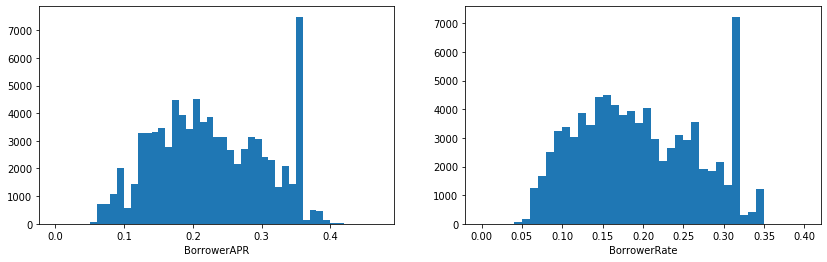

In [12]:
# Looking at the distribution of main variables of interest

plt.figure(figsize = [14, 4]) 
plt.subplot(1, 2, 1)
bins = np.arange(0, df.BorrowerAPR.max()+0.05, 0.01)
plt.hist(data = df, x = 'BorrowerAPR', bins = bins)
plt.xlabel('BorrowerAPR')

plt.subplot(1, 2, 2)
bins = np.arange(0, df.BorrowerRate.max()+0.05, 0.01)
plt.hist(data = df, x = 'BorrowerRate', bins = bins)
plt.xlabel('BorrowerRate')

print(df['BorrowerAPR'].value_counts().nlargest(2))

Both distributions appear normally distributed with a slight left skew. There appears to be a larger spike at around 30%. <br>
0.35797 and 0.35643 are the most common BorrowerAPR rates.

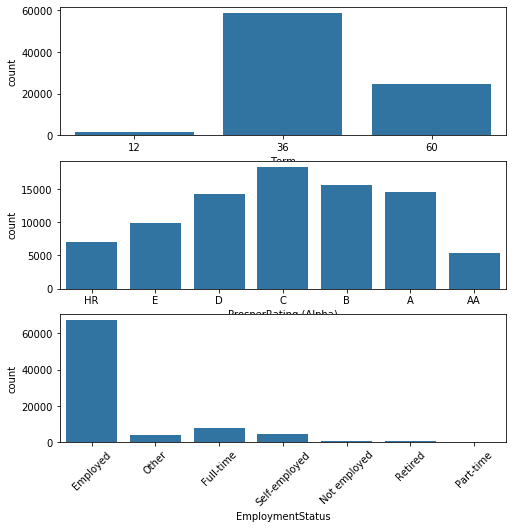

In [13]:
# Looking at the distributions of Term, Prosper Rating and Employment Status

fig, ax = plt.subplots(nrows=3, figsize = [8,8])

default_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'Term', color = default_color, ax = ax[0])
sb.countplot(data = df, x = 'ProsperRating (Alpha)', color = default_color, ax = ax[1])
sb.countplot(data = df, x = 'EmploymentStatus', color = default_color, ax = ax[2])
plt.xticks(rotation=45)
plt.show()

Three Loan Terms are available: 12, 36 and 60 Months. Most Common is 36 Months. <br>
Ratings are divided from Lowest (HR) to Highest (AA) with Average Rating (C). <br>
Majority of the borrowers are Employed.

Text(0.5, 0, 'Loan Status')

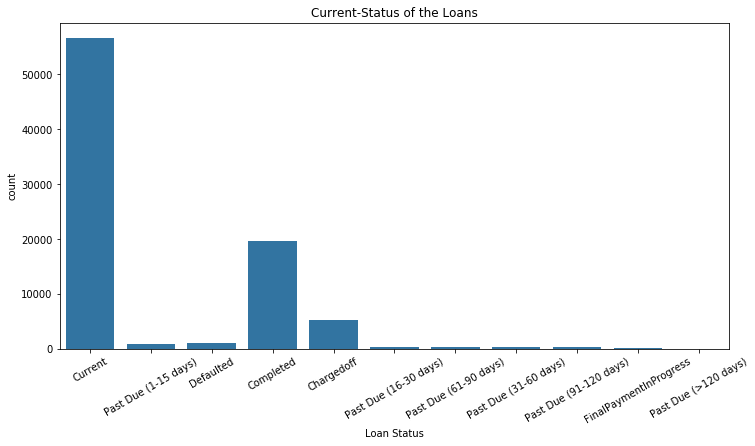

In [14]:
# Determining the Current Status of Loans using sb.counplot() function

plt.figure(figsize=[12, 6])
sb.countplot(data = df, x = 'LoanStatus', color=default_color)
plt.title('Current-Status of the Loans')
plt.xlabel('Count')
plt.xticks(rotation=30)
plt.xlabel('Loan Status')

Most of the loans are 'Current-Loans' with few Completed and some Chargedoff.

Text(0, 0.5, 'Occupation')

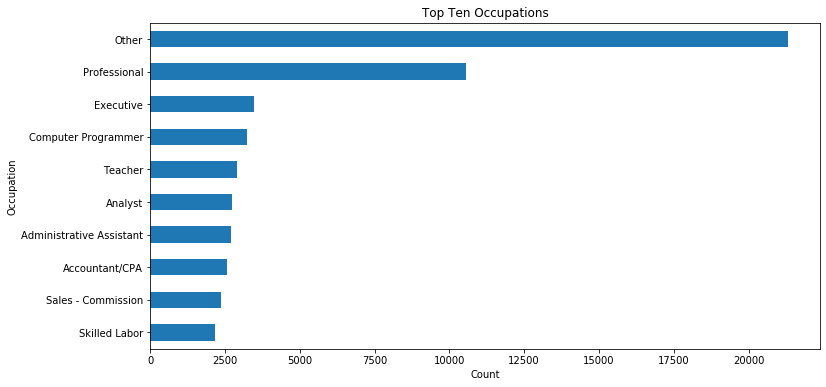

In [15]:
# Finding the Top Ten Occupations of Borrowers using df.col.value_counts() function

plt.figure(figsize=[12, 6])
df['Occupation'].value_counts()[9::-1].plot(kind='barh')
plt.title('Top Ten Occupations')
plt.xlabel('Count')
plt.ylabel('Occupation')

Most Occupations are listed as 'Other' or 'Professional'.

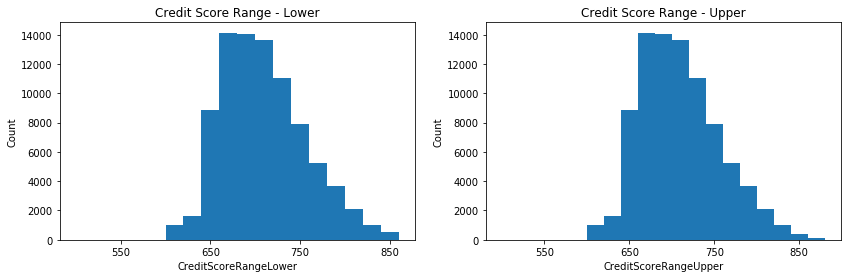

In [16]:
# Checking the distribution of CreditScoreRangeLower and CreditScoreRangeUpper

plt.figure(figsize = [14, 4]) 

plt.subplot(1, 2, 1)
bins = np.arange(500, df['CreditScoreRangeLower'].max(), 20)
plt.hist(data = df, x = 'CreditScoreRangeLower', bins = bins)
plt.xticks(np.arange(550, 900, 100))
plt.title('Credit Score Range - Lower')
plt.xlabel('CreditScoreRangeLower')
plt.ylabel('Count');

plt.subplot(1, 2, 2)
bins = np.arange(500, df['CreditScoreRangeUpper'].max(), 20)
plt.hist(data = df, x = 'CreditScoreRangeUpper', bins = bins)
plt.xticks(np.arange(550, 900, 100))
plt.title('Credit Score Range - Upper')
plt.xlabel('CreditScoreRangeUpper')
plt.ylabel('Count');

Credit Score Ranges appear to be consistent due to their fixed ratios.

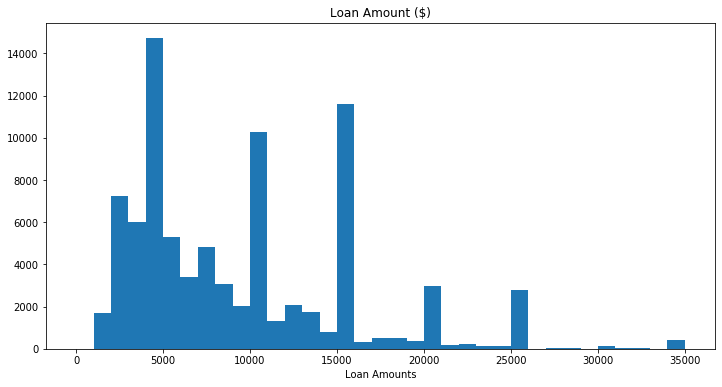

In [17]:
# Looking at the distribution of the Original Loan Amounts

plt.figure(figsize=[12, 6])
bins = np.arange(0, df['LoanOriginalAmount'].max()+1e3, 1e3)
plt.hist(data = df, x = 'LoanOriginalAmount', bins=bins)
plt.xlabel('Loan Amounts')
plt.title('Loan Amount ($)')
plt.show()

Distribution appears left-skewed with large spikes every 5K (around 10K, 15K, 20K and 25K)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

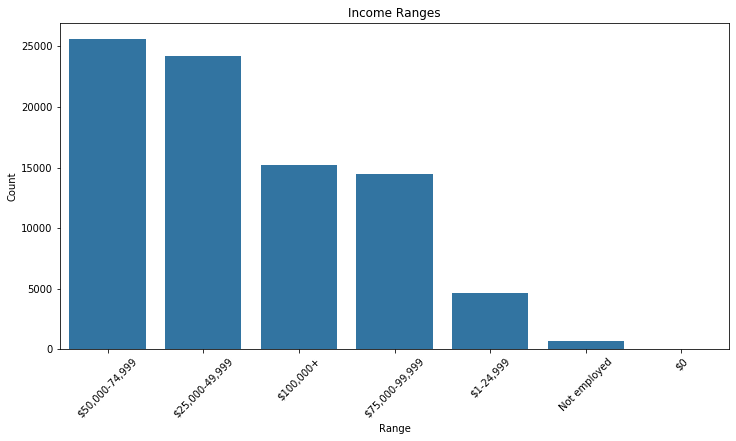

In [18]:
# Determining the Income Ranges of Borrowers using sb.countplot() function

plt.figure(figsize = [12, 6])
sb.countplot(data = df, x = 'IncomeRange', color = default_color)
plt.title('Income Ranges')
plt.xlabel('Range')
plt.ylabel('Count')
plt.xticks(rotation = 45)

Most borrowers have income in the ranges 50K-70K, followed by 25K-50K.

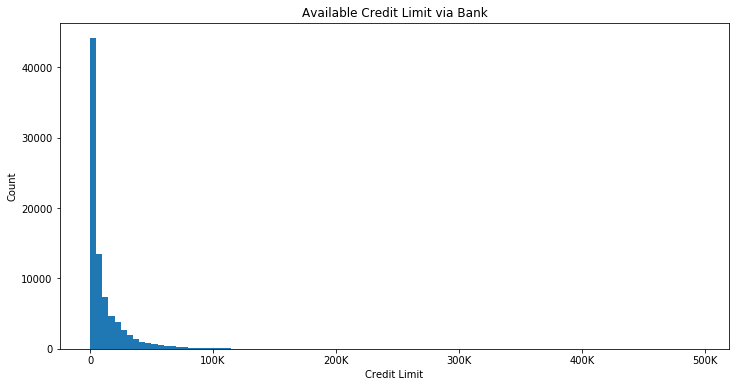

In [19]:
# Finding the total available credit limit via bank for borrower profile 

plt.figure(figsize=[12, 6])
bins = np.arange(0, df['AvailableBankcardCredit'].max(), 5000)
plt.hist(data = df, x = 'AvailableBankcardCredit', bins = bins)
plt.xticks([0, 1e5, 2e5, 3e5, 4e5, 5e5], [0, '100K', '200K', '300K', '400K', '500K'])
plt.title('Available Credit Limit via Bank')
plt.xlabel('Credit Limit')
plt.ylabel('Count');

Most borrowers have Credit Limit upto 100K.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 20 Text xticklabel objects>)

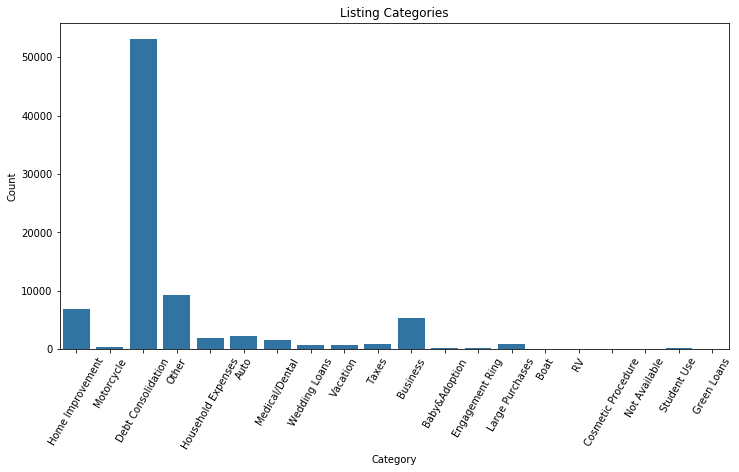

In [20]:
# Converting Listing Category values from numeric to appropriate labels

df['ListingCategory (numeric)'] = df['ListingCategory (numeric)'].replace({
0: 'Not Available',
1: 'Debt Consolidation',
2: 'Home Improvement',
3: 'Business',
4: 'Personal Loan',
5: 'Student Use',
6: 'Auto',
7: 'Other',
8: 'Baby&Adoption',
9: 'Boat',
10: 'Cosmetic Procedure',
11: 'Engagement Ring',
12: 'Green Loans',
13: 'Household Expenses',
14: 'Large Purchases',
15: 'Medical/Dental',
16: 'Motorcycle',
17: 'RV',
18: 'Taxes',
19: 'Vacation',
20: 'Wedding Loans'})

plt.figure(figsize = [12, 6])
sb.countplot(data = df, x = 'ListingCategory (numeric)', color = default_color)
plt.title('Listing Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation = 60)

Most Listing Categories are Debt Consolidation with few others in Home Improvement, Business, Auto.

 <a id = "univariate-analysis"></a>
### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Most of the variables have expected distributions. The distribuition of BorrowerAPR appears to be multimodal in nature. There are no unsual points and therefore there is no need to perform any additional transformations.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> AvailableBankCreditLimit is right-skewed. 

<a id = "bivariate-exploration"></a>
## Bivariate Exploration



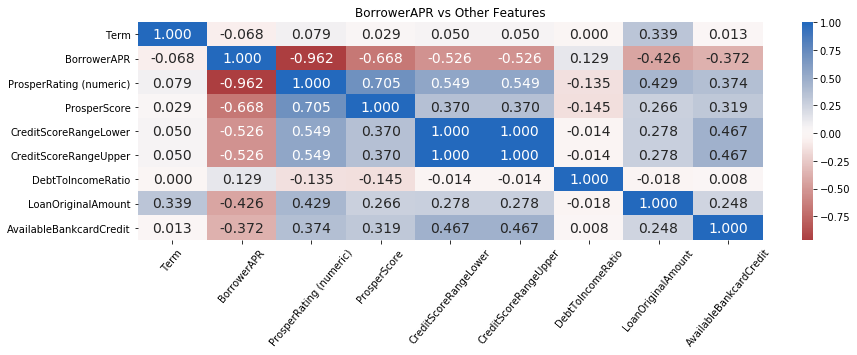

In [51]:
# Plotting pairwise correlations between features in data

numeric_vars = ['Term','BorrowerAPR','ProsperRating (numeric)','ProsperScore','CreditScoreRangeLower','CreditScoreRangeUpper', 'DebtToIncomeRatio','LoanOriginalAmount', 'AvailableBankcardCredit']
plt.figure(figsize = [14, 4])
sb.heatmap(df[numeric_vars].corr(), annot = True, fmt = '.3f',center = 0, cmap='vlag_r', annot_kws={'size':14})
plt.title('BorrowerAPR vs Other Features') 
plt.xticks(rotation=50)
plt.show()


No Strong Positive Correlations can be observed. <br>Lower Credit/Rating Score means borrowers pay higher APR. <br> Good Credit/Rating Score corresponds to trustworthiness.

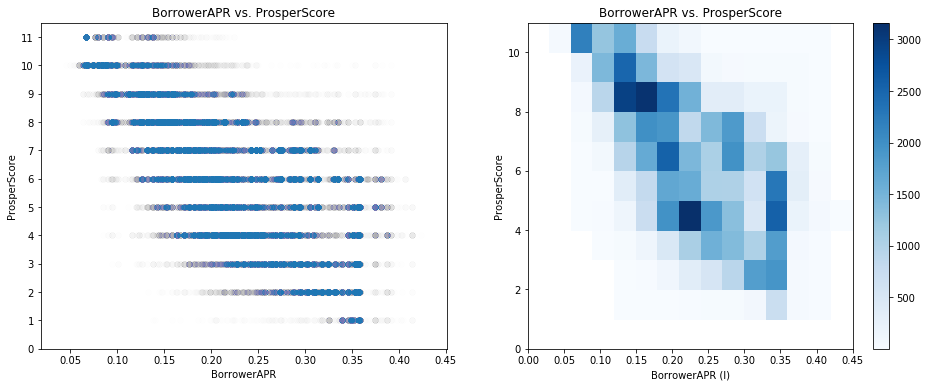

In [49]:
# Comparing ProsperScore and BorrowerAPR 
plt.figure(figsize = [16, 6]) 

plt.subplot(1, 2, 1)
plt.scatter(data = df, x = 'BorrowerAPR', y = 'ProsperScore', alpha =  0.005)
plt.yticks(np.arange(0, 12, 1))
plt.title('BorrowerAPR vs. ProsperScore')
plt.xlabel('BorrowerAPR')
plt.ylabel('ProsperScore')


plt.subplot(1, 2, 2)
bins_x = np.arange(0, df['BorrowerAPR'].max()+0.05, 0.03)
bins_y = np.arange(0, df['ProsperScore'].max()+1, 1)
plt.hist2d(data = df, x = 'BorrowerAPR', y = 'ProsperScore', bins = [bins_x, bins_y], cmap = 'Blues', cmin = 0.5)
plt.colorbar()
plt.title('BorrowerAPR vs. ProsperScore')
plt.xlabel('BorrowerAPR (l)')
plt.ylabel('ProsperScore');

Borrowers with Higher Prosper Scores tend to attain lower APRs than others.

<a id = "bivariate-analysis"></a>
### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The correlation matrix plots are really helpful in understanding relationships among BorrowerAPR and other variables. We observe that ProsperScore has strong (negative) relationship with BorrowerAPR.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> CreditScoreRange is negative correlated with BorrowerAPR and positively correlated with Propser Score.

<a id = "multivariate-exploration"></a>
## Multivariate Exploration



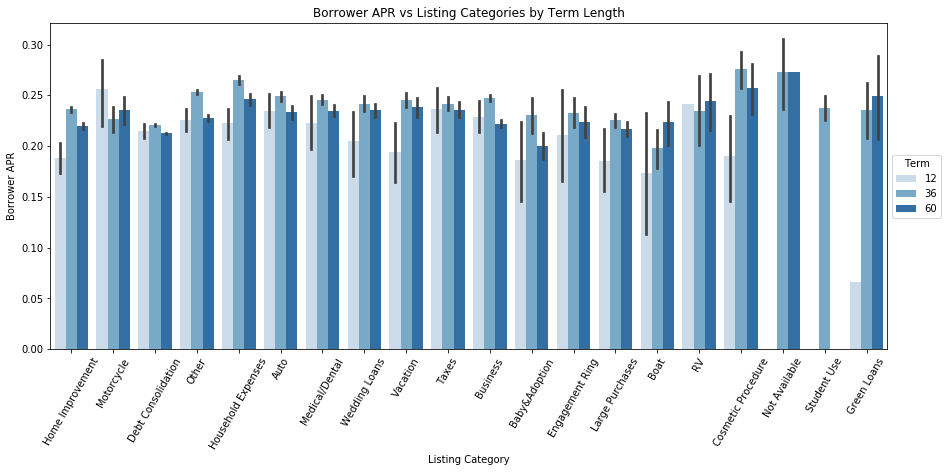

In [50]:
# Determining BorrowerAPR vs Listing Categories for different Terms

fig = plt.figure(figsize = [15,6])
ax = sb.barplot(data = df, x = 'ListingCategory (numeric)', y = 'BorrowerAPR',  hue = 'Term', palette = 'Blues')
plt.title('Borrower APR vs Listing Categories by Term Length')
plt.xlabel('Listing Category')
plt.ylabel('Borrower APR')
plt.xticks(rotation = 60)
ax.legend(loc='center left', title='Term', bbox_to_anchor=(1, 0.5))
plt.show();

Lowerst APR Rates are observerd for 12-Month Tenure in Green Loans, Home Improvements and Large Purchases.

<a id = "multivariate-analysis"></a>
### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> BorrowerAPR is lowest for 12-Month Period among different listing categories. Green Loans, Home Improvements and Large Purchases have the least rates. From all the visulisations plotted above (Univariate/Bivariate/Multivariate), we can observe that BorrowerAPR has negative correlation and Prosper Score has positive correlation among most of the variables.

